<h2>Water Potality Prediction Using Machine Learning Algorithms</h2>
<strong><i>Author: Mesuga, Reymond R.</i></strong><br>
<a href="https://github.com/Rey-commits" target="_blank">GitHub</a> | <a href="https://www.linkedin.com/in/reymond-r-21410/" target="_blank">LinkedIn</a> | <a href="https://rey-commits.web.app/" target="_blank">Website</a>

![](https://solarimpulse.com/img/topics/water-scarcity-header.jpg)

In [1]:
# !pip install pandas numpy plotly matplotlib seaborn --quiet

In [2]:
# !pip install opendatasets scikit-learn --quiet --upgrade

<strong>Importing the Required Libraries</strong>

In [3]:
import plotly.express as px
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<strong>Downloading the Data</strong><br>
The dataset is available at https://www.kaggle.com/adityakadiwal/water-potability .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [4]:
od.download("https://www.kaggle.com/adityakadiwal/water-potability")

Skipping, found downloaded files in "./water-potability" (use force=True to force download)


The dataset is downloaded and extracted to the folder `water-potability`.

In [5]:
os.listdir("water-potability")

['water_potability.csv']

The file `water_potability.csv` contains the data. Let's load it into a Pandas dataframe.

In [6]:
raw_df = pd.read_csv("water-potability/water_potability.csv")

In [7]:
raw_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB




Let's drop any rows where the value of the target column `Potability` is empty.

In [9]:
raw_df.dropna(subset=["Potability"], inplace=True)

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

<AxesSubplot:title={'center':'No. of Data for Potable and Non-Potable'}, xlabel='Potability', ylabel='count'>

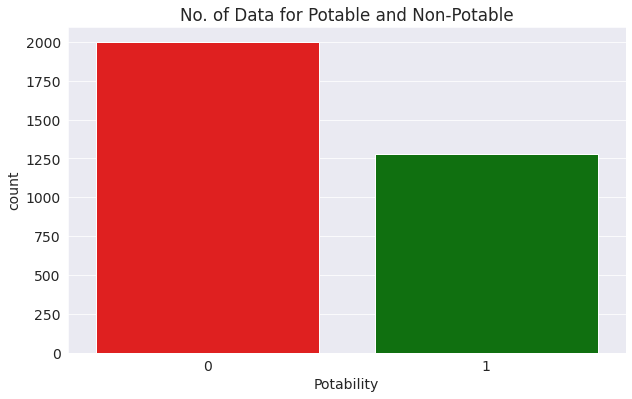

In [11]:
plt.title("No. of Data for Potable and Non-Potable")
sns.countplot(x=raw_df.Potability, palette=['r','g'])

There are more available data recorded from non-potable water than that of potable water. This unbalanced quantity might affect the result of the model but not in a distructive way. Using dataset with more non-potable can cause the model to be more sensitive when predicting water quailty. This helps to prevent human consumption of non-potable water. On the other hand, using unbalanced dataset with more non-potable than potable can cause misclassifcation of clean water when applied to real world. 

<AxesSubplot:xlabel='Potability', ylabel='ph'>

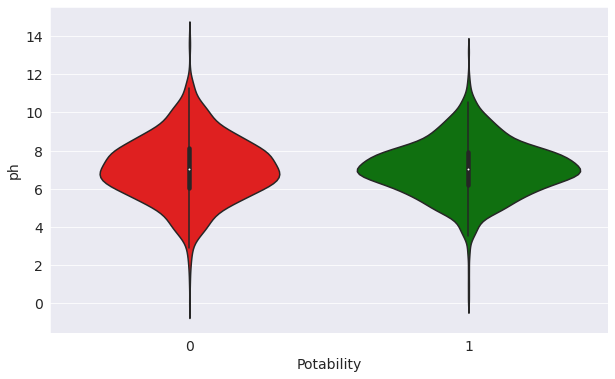

In [12]:
sns.violinplot(x="Potability", y="ph", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Hardness'>

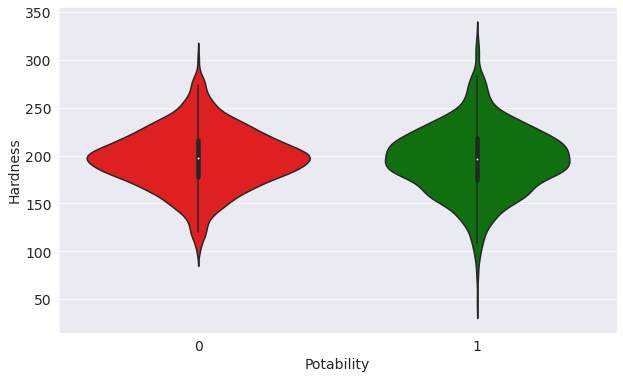

In [13]:
sns.violinplot(x="Potability", y="Hardness", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Solids'>

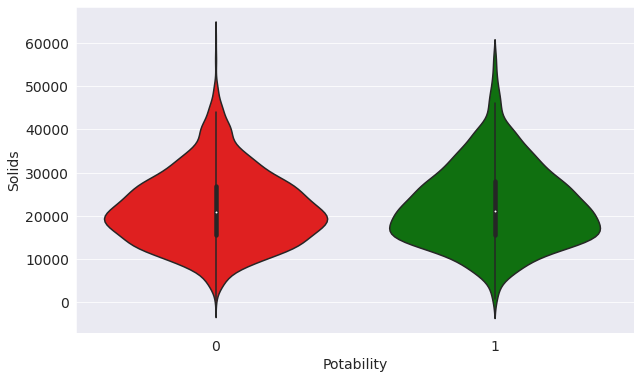

In [14]:
sns.violinplot(x="Potability", y="Solids", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Sulfate'>

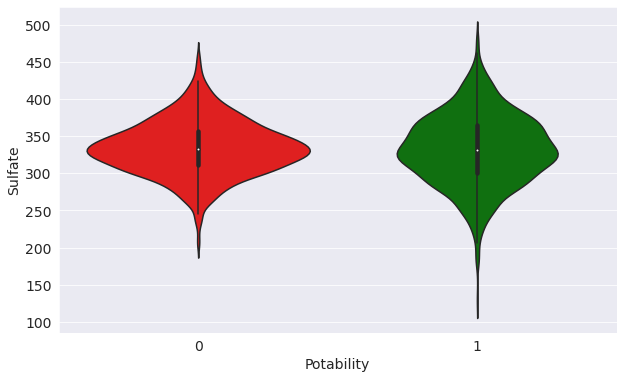

In [15]:
sns.violinplot(x="Potability", y="Sulfate", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Chloramines'>

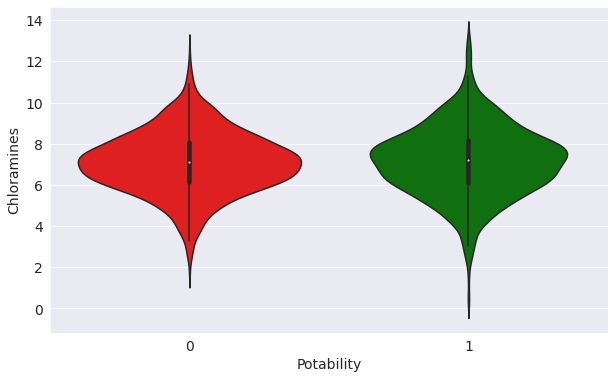

In [16]:
sns.violinplot(x="Potability", y="Chloramines", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Conductivity'>

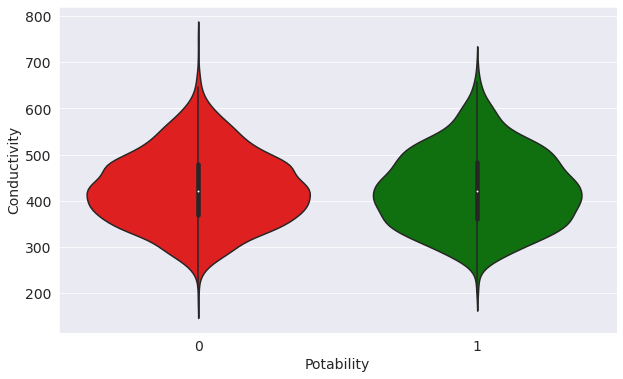

In [17]:
sns.violinplot(x="Potability", y="Conductivity", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Organic_carbon'>

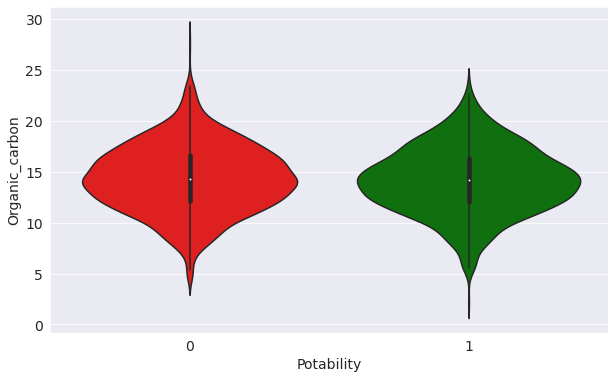

In [18]:
sns.violinplot(x="Potability", y="Organic_carbon", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Trihalomethanes'>

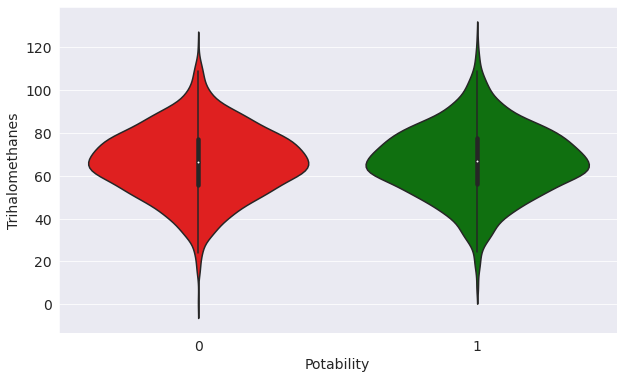

In [19]:
sns.violinplot(x="Potability", y="Trihalomethanes", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Trihalomethanes'>

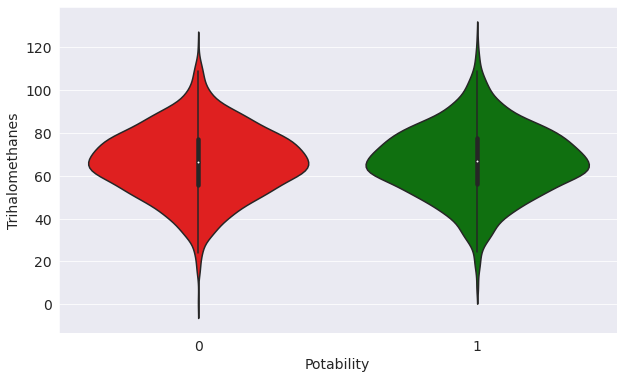

In [20]:
sns.violinplot(x="Potability", y="Trihalomethanes", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Turbidity'>

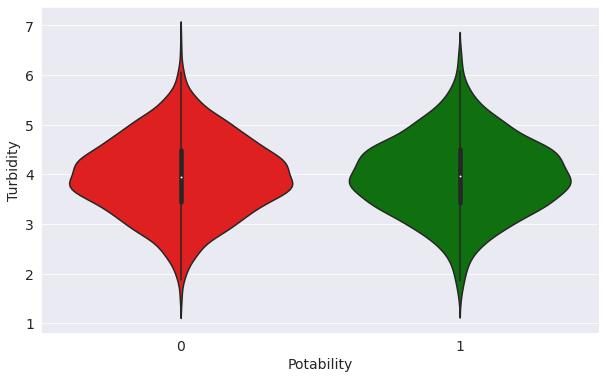

In [21]:
sns.violinplot(x="Potability", y="Turbidity", data=raw_df, palette=['r','g'])

Text(0.5, 1.0, 'Correlation Matrix')

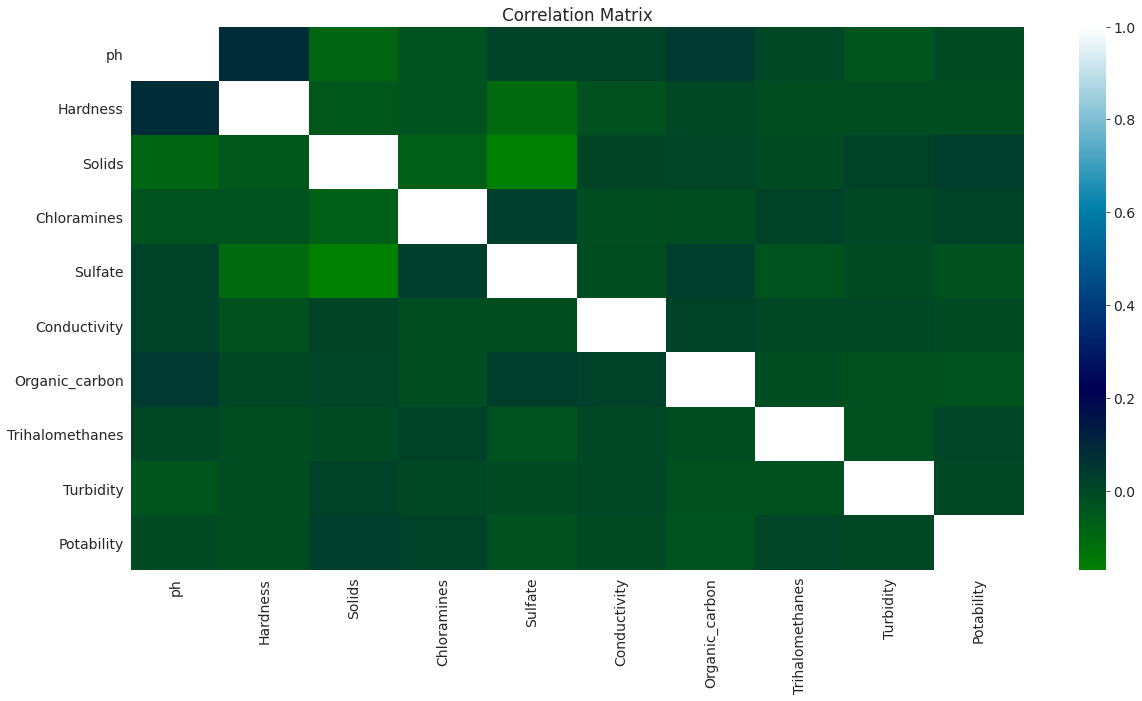

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(raw_df.corr(), ax=ax, cmap="ocean")
plt.title("Correlation Matrix")

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.1, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.1112, random_state=42)

In [25]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (2620, 10)
val_df.shape : (328, 10)
test_df.shape : (328, 10)


<strong>Identifying Input and Target Columns</strong>

In [26]:
input_cols = list(train_df.columns)[0:-1]
target_col = "Potability"

In [27]:
print("input_cols =", input_cols)
print("------------------------------")
print("target_col =", target_col)

input_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
------------------------------
target_col = Potability


We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [28]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [29]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [30]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

<strong>Scaling the Numerical Values on Each Column</strong><br>
Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges. Note that only scale the inputs and not the targets.

In [31]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols, len(numeric_cols)

(['ph',
  'Hardness',
  'Solids',
  'Chloramines',
  'Sulfate',
  'Conductivity',
  'Organic_carbon',
  'Trihalomethanes',
  'Turbidity'],
 9)

In [32]:
raw_df[numeric_cols].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


<strong>Applying Imputattion for Missing Numerical Values</strong>

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [35]:
# Aliasing for convenience
train_inputs = train_inputs[numeric_cols]
val_inputs = val_inputs[numeric_cols]
test_inputs = test_inputs[numeric_cols]

<strong>Checking Again for Missing Values</strong>

In [38]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2620 entries, 2993 to 1179
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2620 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          2620 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2620 non-null   float64
 8   Turbidity        2620 non-null   float64
dtypes: float64(9)
memory usage: 204.7 KB


In [43]:
train_targets.shape

(2620,)

In [44]:
val_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 1345 to 2476
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               328 non-null    float64
 1   Hardness         328 non-null    float64
 2   Solids           328 non-null    float64
 3   Chloramines      328 non-null    float64
 4   Sulfate          328 non-null    float64
 5   Conductivity     328 non-null    float64
 6   Organic_carbon   328 non-null    float64
 7   Trihalomethanes  328 non-null    float64
 8   Turbidity        328 non-null    float64
dtypes: float64(9)
memory usage: 25.6 KB


In [45]:
val_targets.shape

(328,)

In [46]:
test_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 2947 to 742
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               328 non-null    float64
 1   Hardness         328 non-null    float64
 2   Solids           328 non-null    float64
 3   Chloramines      328 non-null    float64
 4   Sulfate          328 non-null    float64
 5   Conductivity     328 non-null    float64
 6   Organic_carbon   328 non-null    float64
 7   Trihalomethanes  328 non-null    float64
 8   Turbidity        328 non-null    float64
dtypes: float64(9)
memory usage: 25.6 KB


In [47]:
test_targets.shape

(328,)